In [2]:
import numpy as np
import pandas as pd
from glob import glob
import sys
from icecube import astro
sys.path.append('/home/apizzuto/Nova/scripts/')
from Novae import Nova
from config import *
import matplotlib.pyplot as plt
import time
from astropy.time import Time
import seaborn as sns
import matplotlib as mpl
from numpy.lib.recfunctions import append_fields
plt.style.use('/home/apizzuto/Nova/scripts/novae_plots.mplstyle')
%matplotlib inline
palette = sns.color_palette('colorblind')

In [3]:
df = pd.read_csv('/home/apizzuto/Nova/Novae_details.csv')
df = df.sort_values('Start Time (gamma ray)')

novae = []
for index, row in df.iterrows():
    a = Nova(row['Name'], -1*row['EPL gamma'], np.radians(row['RA (Deg)']), np.radians(row['Dec. (Deg)']), 
                row['Start Time (gamma ray)'], row['Duration (gamma ray)'], flux_norm=row['EPL flux']*1e-7, cutoff = row['EPL cutoff '])
    novae.append(a)
datafs = sorted(glob('/data/user/mlarson/combo_r129072/skylab/scripts/testing/GRECO/version-001-p00/IC86_*_data.npy'))
datas = [np.load(dataf) for dataf in datafs]
mc = np.load('/data/user/mlarson/combo_r129072/skylab/scripts/testing/GRECO/version-001-p00/IC86_2012_mc.npy')
grlfs = sorted(glob('/data/user/mlarson/combo_r129072/skylab/scripts/testing/GRECO/version-001-p00/GRL/IC86_*_data.npy'))
grls = [np.load(grlf) for grlf in grlfs]

In [4]:
novae = []
for index, row in df.iterrows():
    a = Nova(row['Name'], -1.*row['SPL gamma'], np.radians(row['RA (Deg)']), np.radians(row['Dec. (Deg)']), 
                row['Start Time (gamma ray)'], row['Duration (gamma ray)'], flux_norm=row['SPL flux']*1e-7, cutoff = None)
    novae.append(a)

In [5]:
for sigma in ['1', '10', '20', '30', '45', '90']:
    for index in range(15):
        for spec in ['SPL', 'EPL']:
            try:
                a = np.load('/data/user/apizzuto/Nova/analysis_trials/bg/index_{}_spec_{}_sigma_{}.npy'.format(index, spec, sigma),
                       allow_pickle=True).item()
            except:
                print '/data/user/apizzuto/Nova/analysis_trials/bg/index_{}_spec_{}_sigma_{}.npy doesnt exist'.format(index, spec, sigma)
                
                
                

/data/user/apizzuto/Nova/analysis_trials/bg/index_0_spec_SPL_sigma_1.npy doesnt exist
/data/user/apizzuto/Nova/analysis_trials/bg/index_0_spec_EPL_sigma_1.npy doesnt exist
/data/user/apizzuto/Nova/analysis_trials/bg/index_10_spec_SPL_sigma_1.npy doesnt exist
/data/user/apizzuto/Nova/analysis_trials/bg/index_10_spec_EPL_sigma_1.npy doesnt exist
/data/user/apizzuto/Nova/analysis_trials/bg/index_11_spec_SPL_sigma_1.npy doesnt exist
/data/user/apizzuto/Nova/analysis_trials/bg/index_11_spec_EPL_sigma_1.npy doesnt exist
/data/user/apizzuto/Nova/analysis_trials/bg/index_12_spec_SPL_sigma_1.npy doesnt exist
/data/user/apizzuto/Nova/analysis_trials/bg/index_12_spec_EPL_sigma_1.npy doesnt exist
/data/user/apizzuto/Nova/analysis_trials/bg/index_13_spec_SPL_sigma_1.npy doesnt exist
/data/user/apizzuto/Nova/analysis_trials/bg/index_13_spec_EPL_sigma_1.npy doesnt exist
/data/user/apizzuto/Nova/analysis_trials/bg/index_14_spec_SPL_sigma_1.npy doesnt exist
/data/user/apizzuto/Nova/analysis_trials/bg/i

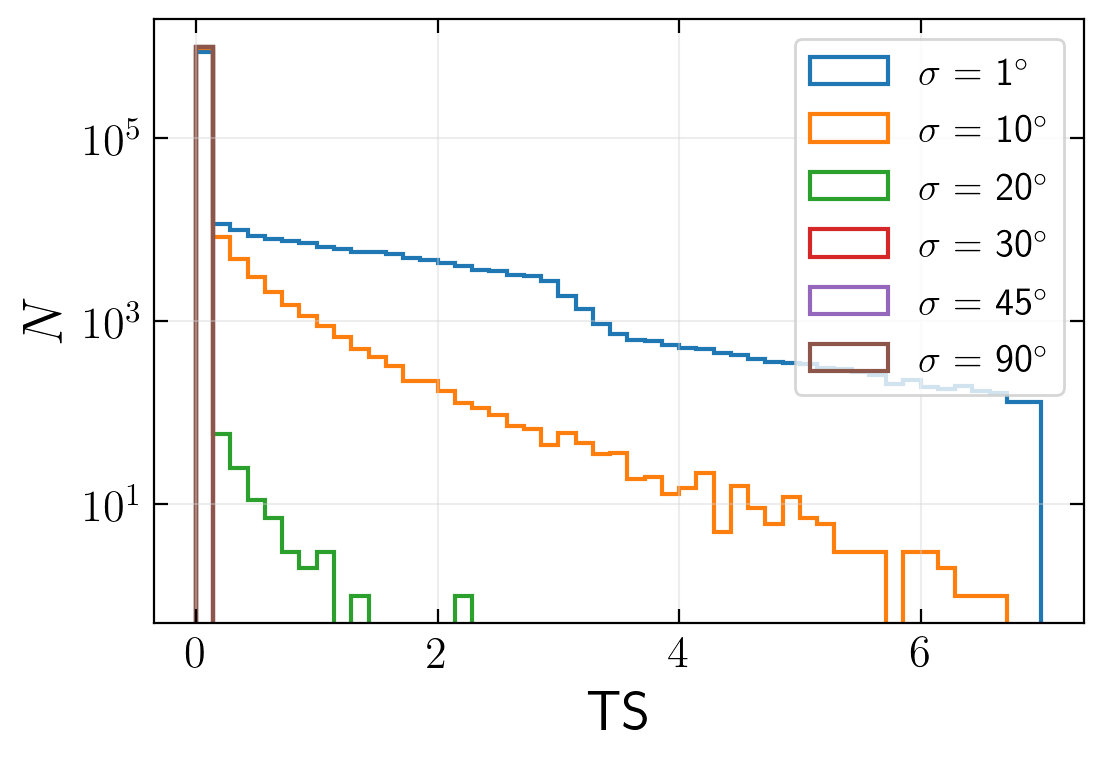

In [9]:
index = 8
spec = 'EPL'
fig, ax = plt.subplots(dpi=200)
#sigma = '10'
for sigma in ['1', '10', '20', '30', '45', '90']:
    trials = np.load('/data/user/apizzuto/Nova/analysis_trials/bg/index_{}_spec_{}_sigma_{}.npy'.format(index, spec, sigma),
               allow_pickle=True).item()
    plt.hist(trials['TS'], bins = np.linspace(0., 7., 50), histtype = 'step', linewidth = 1.5, label =r'$\sigma$ = {}'.format(sigma) + r'$^{\circ}$')
    
plt.legend(loc = 1, fontsize = 14)
plt.xlabel("TS", fontsize = 20)
plt.ylabel(r'$N$', fontsize = 20)
plt.yscale('log')

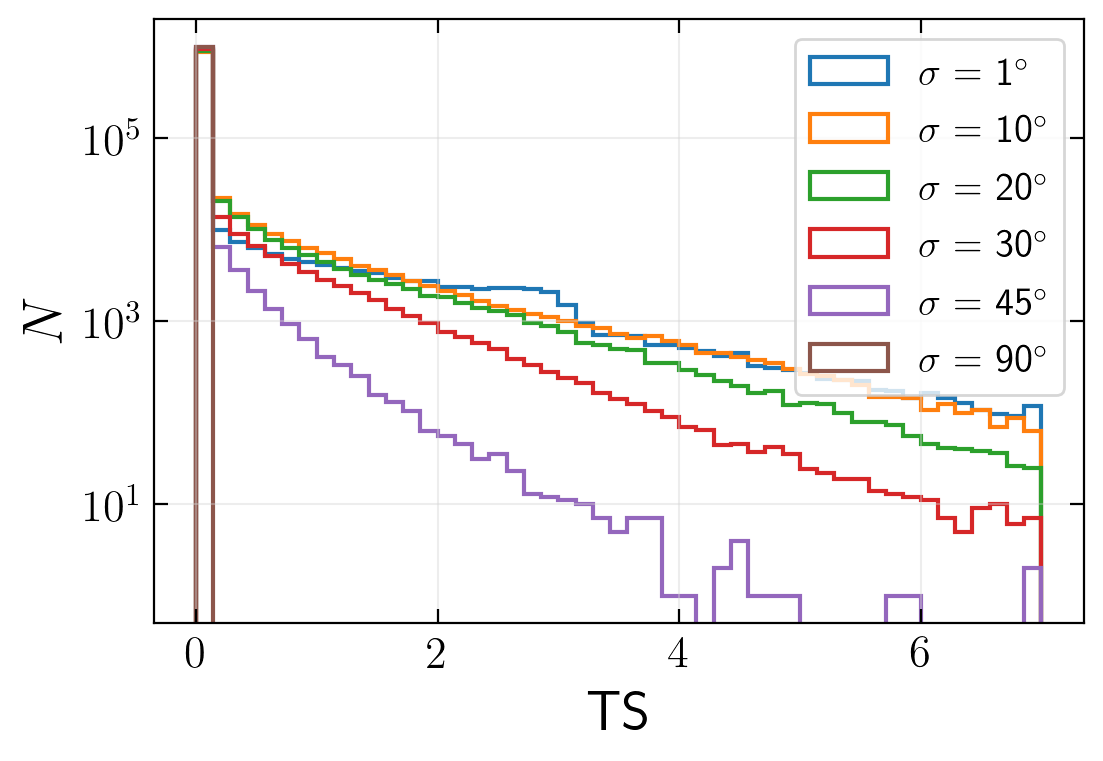

In [10]:
index = 8
spec = 'SPL'
fig, ax = plt.subplots(dpi = 200)
#sigma = '10'
for sigma in ['1', '10', '20', '30', '45', '90']:
    trials = np.load('/data/user/apizzuto/Nova/analysis_trials/bg/index_{}_spec_{}_sigma_{}.npy'.format(index, spec, sigma),
               allow_pickle=True).item()
    plt.hist(trials['TS'], bins = np.linspace(0., 7., 50), histtype = 'step', linewidth = 1.5, label =r'$\sigma$ = {}'.format(sigma) + r'$^{\circ}$')
    
plt.legend(loc = 1, fontsize = 14)
plt.xlabel("TS", fontsize = 20)
plt.ylabel(r'$N$', fontsize = 20)
plt.yscale('log')

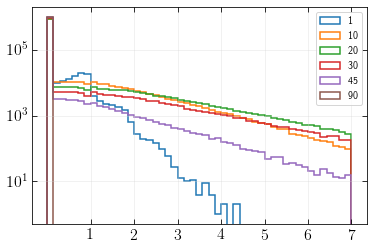

In [21]:
index = 8
spec = 'SPL'
#sigma = '10'
for sigma in ['1', '10', '20', '30', '45', '90']:
    trials = np.load('/data/user/apizzuto/Nova/analysis_trials/bg/index_{}_spec_{}_sigma_{}.npy'.format(index, spec, sigma),
               allow_pickle=True).item()
    plt.hist(trials['ns'], bins = np.linspace(0., 7., 50), histtype = 'step', linewidth = 1.5, )
    
plt.xticks(np.linspace(1, 7, 7))
plt.legend(loc = 1)
plt.yscale('log')

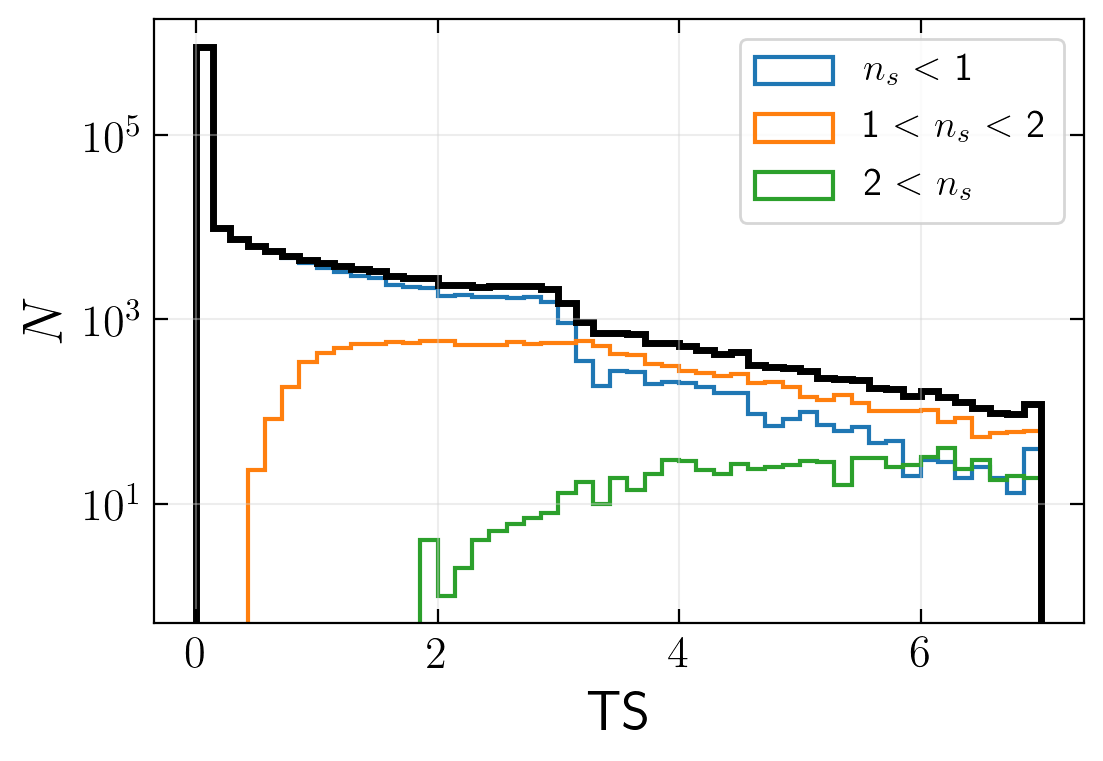

In [12]:
#sigma = '10'
sigma = '1'
fig, ax = plt.subplots(dpi=200)
trials = np.load('/data/user/apizzuto/Nova/analysis_trials/bg/index_{}_spec_{}_sigma_{}.npy'.format(index, spec, sigma),
               allow_pickle=True).item()
plt.hist(trials['TS'][trials['ns'] <= 1.], bins = np.linspace(0., 7., 50), histtype = 'step', linewidth = 1.5, label = r'$n_s$ $<$ 1')
plt.hist(trials['TS'][(trials['ns'] > 1.) & (trials['ns'] < 2.)], bins = np.linspace(0., 7., 50), histtype = 'step', linewidth = 1.5, label = r'1 $<$ $n_s$ $<$ 2')
plt.hist(trials['TS'][trials['ns'] >= 2.], bins = np.linspace(0., 7., 50), histtype = 'step', linewidth = 1.5, label = r'2 $<$ $n_s$')
plt.hist(trials['TS'],  bins = np.linspace(0., 7., 50), histtype = 'step', linewidth = 2.5, color = 'k')    

plt.legend(loc = 1, fontsize = 14)
plt.xlabel("TS", fontsize = 20)
plt.ylabel(r'$N$', fontsize = 20)
plt.yscale('log')

Text(0,0.5,'$n_s$')

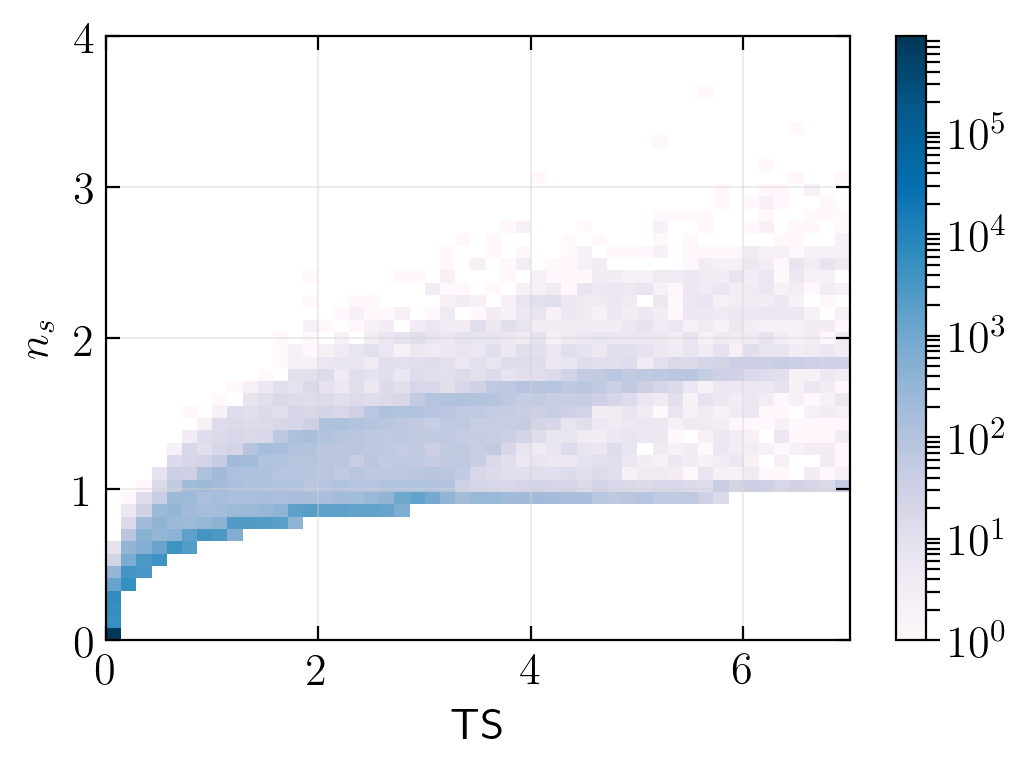

In [19]:
from matplotlib.colors import LogNorm
fig, ax = plt.subplots(dpi=200)
plt.hist2d(trials['TS'], trials['ns'], bins = [np.linspace(0., 7., 50), np.linspace(0, 4, 50)],
          norm = LogNorm())
cbar = plt.colorbar()
cbar.ax.tick_params(direction = 'out')
plt.xlabel('TS', fontsize = 16)
plt.ylabel(r'$n_s$', fontsize = 16)

In [17]:
cbar.ax.tick_params(direction = 'out')